## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import fetch_lfw_people

from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_datasets as tfds

## Tweaking Libraries

In [2]:
mpl.rcParams['figure.dpi']= 300

## Downloading the Data

Before even looking at the data, it is important that we download it in the first place.
The library automatically downloads the dataset; therefore, we will just attempt to *fetch* the data using `fetch_lfw_people()`.

According to the [`sklearn.datasets.fetch_lfw_people` docs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html), `fetch_lfw_people` can take multiple arguments...

We will be using `color`, so we will be setting that attribute to `True`.

In [3]:
lfw_people = fetch_lfw_people(funneled=True, color=True)

According to the *docs*, the *dict* output contains three important *keys* :
- *data*
- *target*
- *target_names*

So, we will go ahead and assign our `X` or *data*, our `y` or *target*, and our `names` or *target_names*.

In [4]:
X = lfw_people['data']
y = lfw_people['target']

names = lfw_people['target_names']

## Converting Data to DataFrame

We will be converting the data into a `pandas.DataFrame` in order to ease the plotting and working with the data.

In [5]:
X = pd.DataFrame(X)
y = pd.DataFrame(y, columns=['pid']) # pid is person_id

df = y.join(X)

Here's a quick look at our `DataFrame`...

In [6]:
df

,pid,0,1,2,3,4,5,6,7,8,...,8732,8733,8734,8735,8736,8737,8738,8739,8740,8741
0,5360,42.0,31.0,29.0,36.0,27.0,25.0,30.0,19.0,18.0,...,12.0,14.0,13.0,17.0,15.0,14.0,19.0,13.0,12.0,17.0
1,3434,176.0,164.0,134.0,177.0,168.0,137.0,187.0,178.0,144.0,...,129.0,137.0,143.0,136.0,133.0,140.0,133.0,128.0,135.0,128.0
2,3807,93.0,71.0,67.0,101.0,75.0,68.0,114.0,80.0,70.0,...,200.0,196.0,195.0,185.0,153.0,147.0,136.0,75.0,65.0,59.0
3,26,7.0,16.0,11.0,8.0,15.0,11.0,8.0,16.0,11.0,...,77.0,164.0,117.0,73.0,148.0,106.0,65.0,126.0,94.0,57.0
4,3957,40.0,35.0,22.0,39.0,34.0,21.0,39.0,34.0,21.0,...,7.0,27.0,18.0,6.0,31.0,20.0,8.0,37.0,23.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13228,5252,34.0,32.0,22.0,32.0,29.0,17.0,35.0,29.0,13.0,...,2.0,30.0,22.0,4.0,37.0,26.0,7.0,54.0,39.0,18.0
13229,2122,129.0,121.0,82.0,137.0,126.0,84.0,156.0,145.0,99.0,...,83.0,76.0,106.0,96.0,93.0,65.0,56.0,106.0,18.0,15.0
13230,2175,25.0,39.0,50.0,37.0,39.0,49.0,59.0,52.0,55.0,...,76.0,54.0,66.0,78.0,53.0,63.0,75.0,42.0,54.0,67.0
13231,373,11.0,15.0,24.0,18.0,22.0,33.0,54.0,58.0,69.0,...,252.0,208.0,219.0,230.0,131.0,143.0,156.0,57.0,68.0,83.0


## Looking at the Data

We have 13233 rows that we will be dealing with. First we need to identify how many unique *targets* we have.

In [7]:
num_unique_pids = df['pid'].nunique()

print('Unique Targets or Person Ids :', num_unique_pids)

Unique Targets or Person Ids : 5749


Let's take a closer look at their frequency.

In [8]:
num_imgs_per_pid = df['pid'].value_counts()

num_imgs_per_pid

1871    530
1047    236
5458    144
1404    121
1892    109
       ... 
1660      1
3709      1
1668      1
3717      1
0         1
Name: pid, Length: 5749, dtype: int64

According to the above output, we have *5749* unique *targets* or *person ids*.
We can also notice that the *person id* with the highest *number of images* is *1871* with *530* images.



Since we have such a huge number, we won't be plotting the *number of images* available for each *person id* with a *bar plot*.

Instead, we will be creating a *bar plot* with the *number of images* between a certain *interval*.

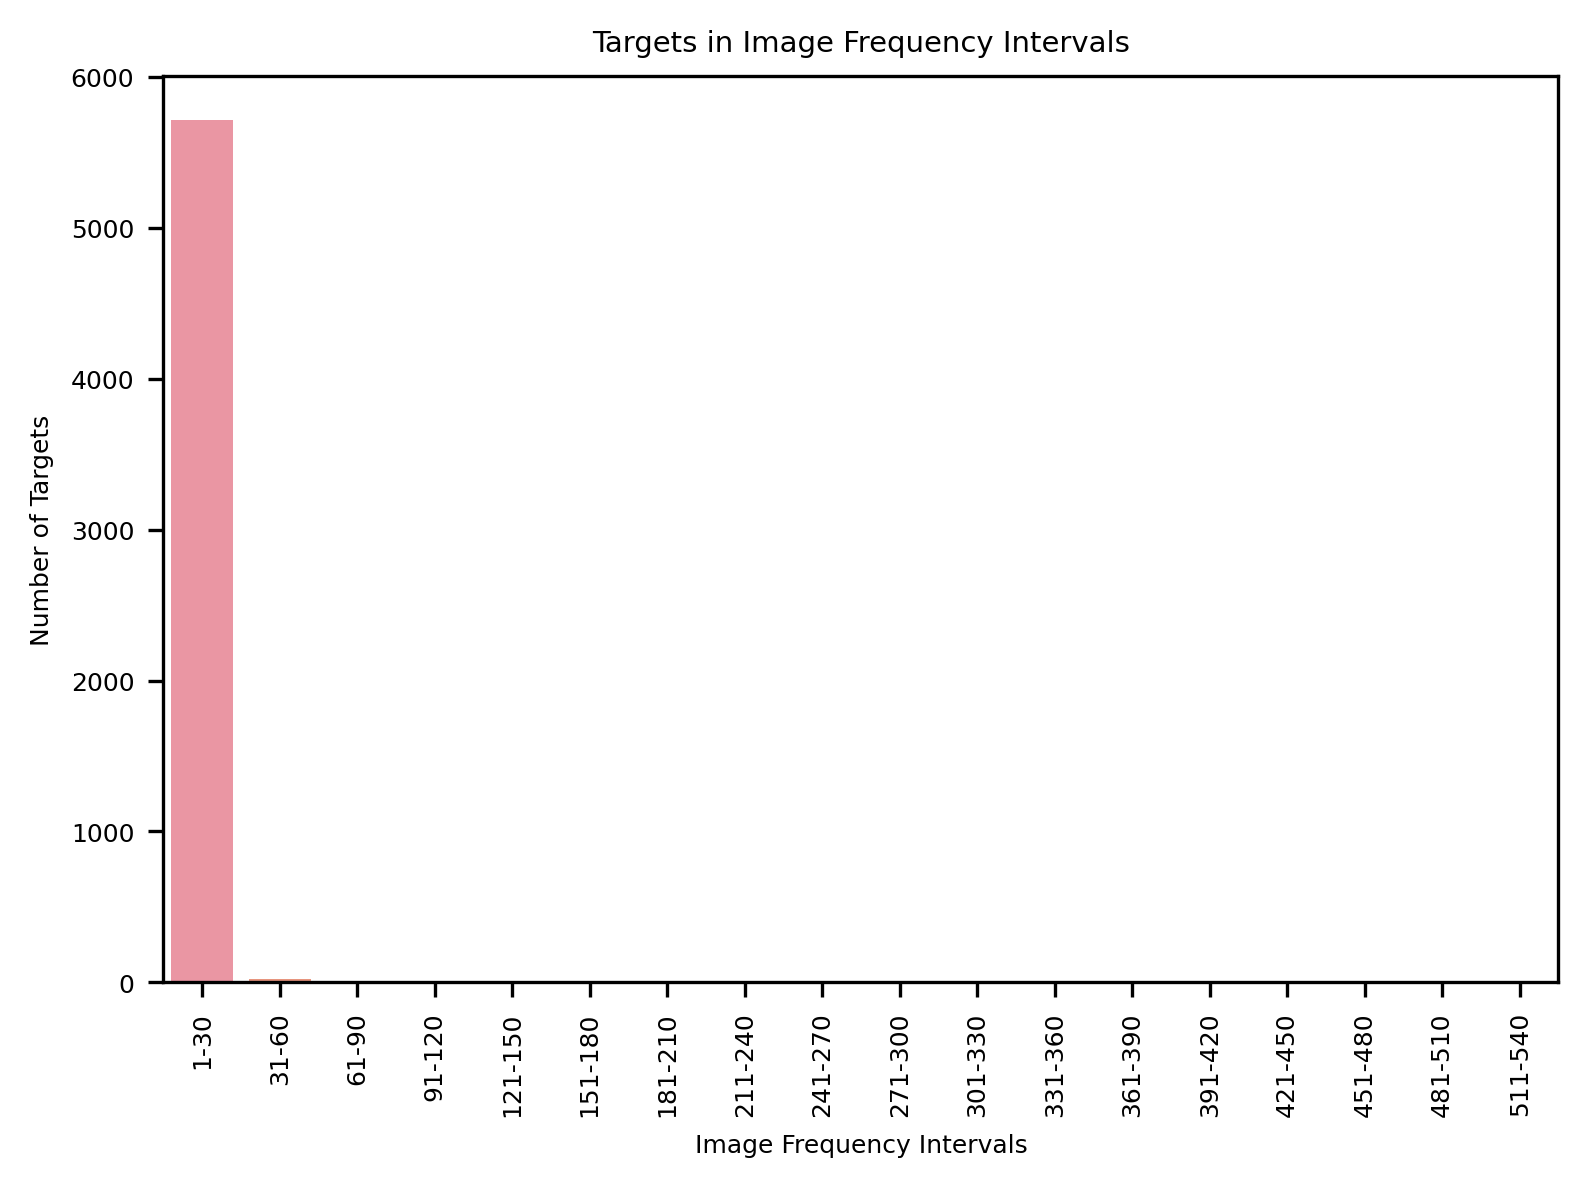

In [9]:
def plot_num_imgs_per_pid(num_imgs_per_pid, x_values):
    if type(x_values) is range:
        plot_x = [ '{0}-{1}'.format((i + 1), (i + x_values.step)) 
                      if x_values.step > 1 else (i + 1) 
                          for i in x_values ]
        plot_y = [ len(num_imgs_per_pid[num_imgs_per_pid.map(lambda x: (i) < x <= (i + x_values.step))]) 
                        for i in x_values ]
        
        plot_x_label = 'Image Frequency Intervals' if x_values.step > 1 else 'Numer of Images'
    else:
        plot_x = x_values
        plot_y = [ len(num_imgs_per_pid[num_imgs_per_pid.map(lambda x: x == i)])
                        for i in x_values ]
        
        plot_x_label = 'Numer of Images'
    
    sns.barplot(x=plot_x, y=plot_y)
    
    plt.title('Targets in Image Frequency Intervals', size=7)
    plt.xlabel(plot_x_label, size=6)
    plt.xticks(rotation='vertical', size=6)
    plt.yticks(rotation='horizontal', size=6)
    plt.ylabel('Number of Targets', size=6)
    plt.show()

plot_num_imgs_per_pid(num_imgs_per_pid, range(0, 530, 30))

As you can see, most of the targets have between 0 to 30 images. However, having a person with only 1 image can really lower the accuracy of our model. Therefore, we will be viewing the interval 0 to 30 in more depth.

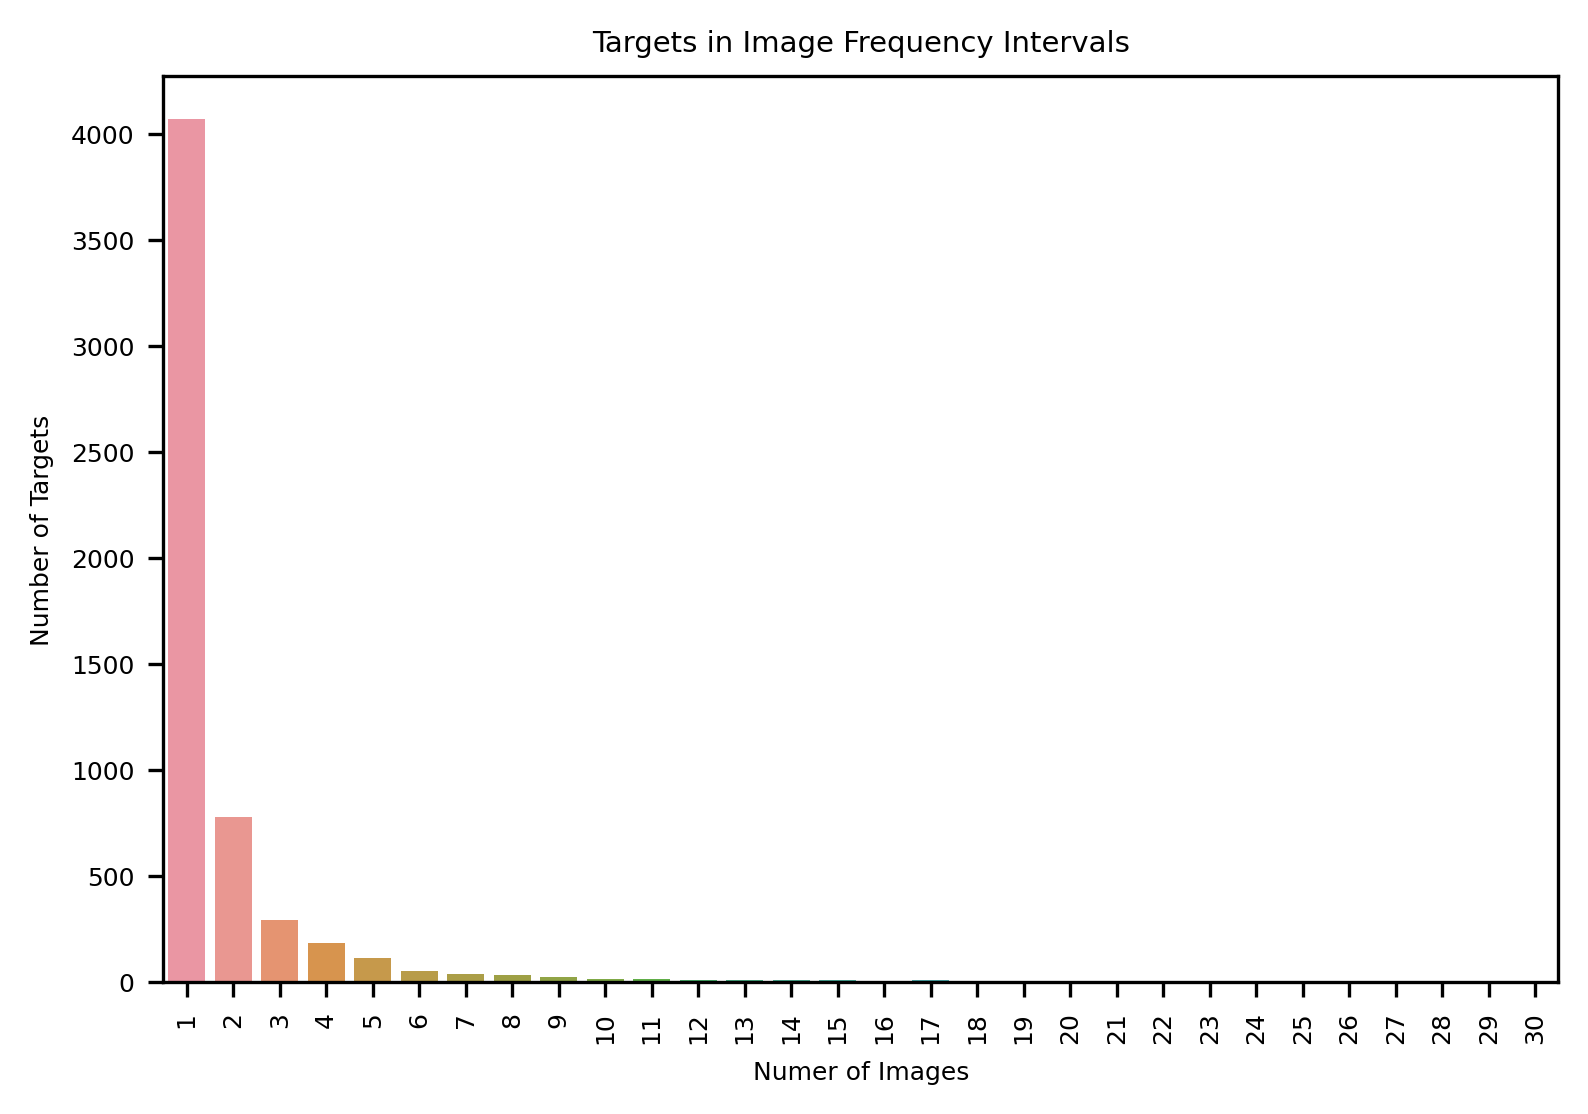

In [10]:
plot_num_imgs_per_pid(num_imgs_per_pid, range(0, 30, 1))

As we can see, most targets have only 1 *image*.

It is important that we avoid those images as we do not wish that they be present inside our *test* data.
Their presence in our *test* data can introduce faces that the model does not know; therefore, resulting in wrong predictions and lower accuracy.

## Splitting the Data

Before we go on and split the data, we have to clean it first. Cleaning it will involve removing all the *faces* which have only 1 *image*.

In [11]:
targets_with_one_img = num_imgs_per_pid[num_imgs_per_pid == 1]

filtered_df = df[df['pid'].map(lambda x: x not in targets_with_one_img)]

filtered_df

,pid,0,1,2,3,4,5,6,7,8,...,8732,8733,8734,8735,8736,8737,8738,8739,8740,8741
0,5360,42.0,31.0,29.0,36.0,27.0,25.0,30.0,19.0,18.0,...,12.0,14.0,13.0,17.0,15.0,14.0,19.0,13.0,12.0,17.0
1,3434,176.0,164.0,134.0,177.0,168.0,137.0,187.0,178.0,144.0,...,129.0,137.0,143.0,136.0,133.0,140.0,133.0,128.0,135.0,128.0
3,26,7.0,16.0,11.0,8.0,15.0,11.0,8.0,16.0,11.0,...,77.0,164.0,117.0,73.0,148.0,106.0,65.0,126.0,94.0,57.0
8,5465,78.0,79.0,73.0,82.0,79.0,74.0,82.0,79.0,75.0,...,103.0,112.0,110.0,103.0,111.0,110.0,103.0,110.0,110.0,102.0
12,2697,35.0,20.0,10.0,56.0,40.0,24.0,83.0,65.0,41.0,...,21.0,27.0,12.0,8.0,20.0,9.0,9.0,19.0,9.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13225,2530,86.0,81.0,50.0,98.0,91.0,57.0,127.0,119.0,83.0,...,14.0,32.0,37.0,23.0,36.0,44.0,28.0,38.0,47.0,30.0
13228,5252,34.0,32.0,22.0,32.0,29.0,17.0,35.0,29.0,13.0,...,2.0,30.0,22.0,4.0,37.0,26.0,7.0,54.0,39.0,18.0
13230,2175,25.0,39.0,50.0,37.0,39.0,49.0,59.0,52.0,55.0,...,76.0,54.0,66.0,78.0,53.0,63.0,75.0,42.0,54.0,67.0
13231,373,11.0,15.0,24.0,18.0,22.0,33.0,54.0,58.0,69.0,...,252.0,208.0,219.0,230.0,131.0,143.0,156.0,57.0,68.0,83.0


So let's take a quick look again at the number of unique people we have in our dataset.

In [12]:
num_unique_pids = filtered_df['pid'].nunique()

print('Unique Targets or Person Ids :', num_unique_pids)

Unique Targets or Person Ids : 1680


So let's take a quick look again at the frequency of the data that we have.

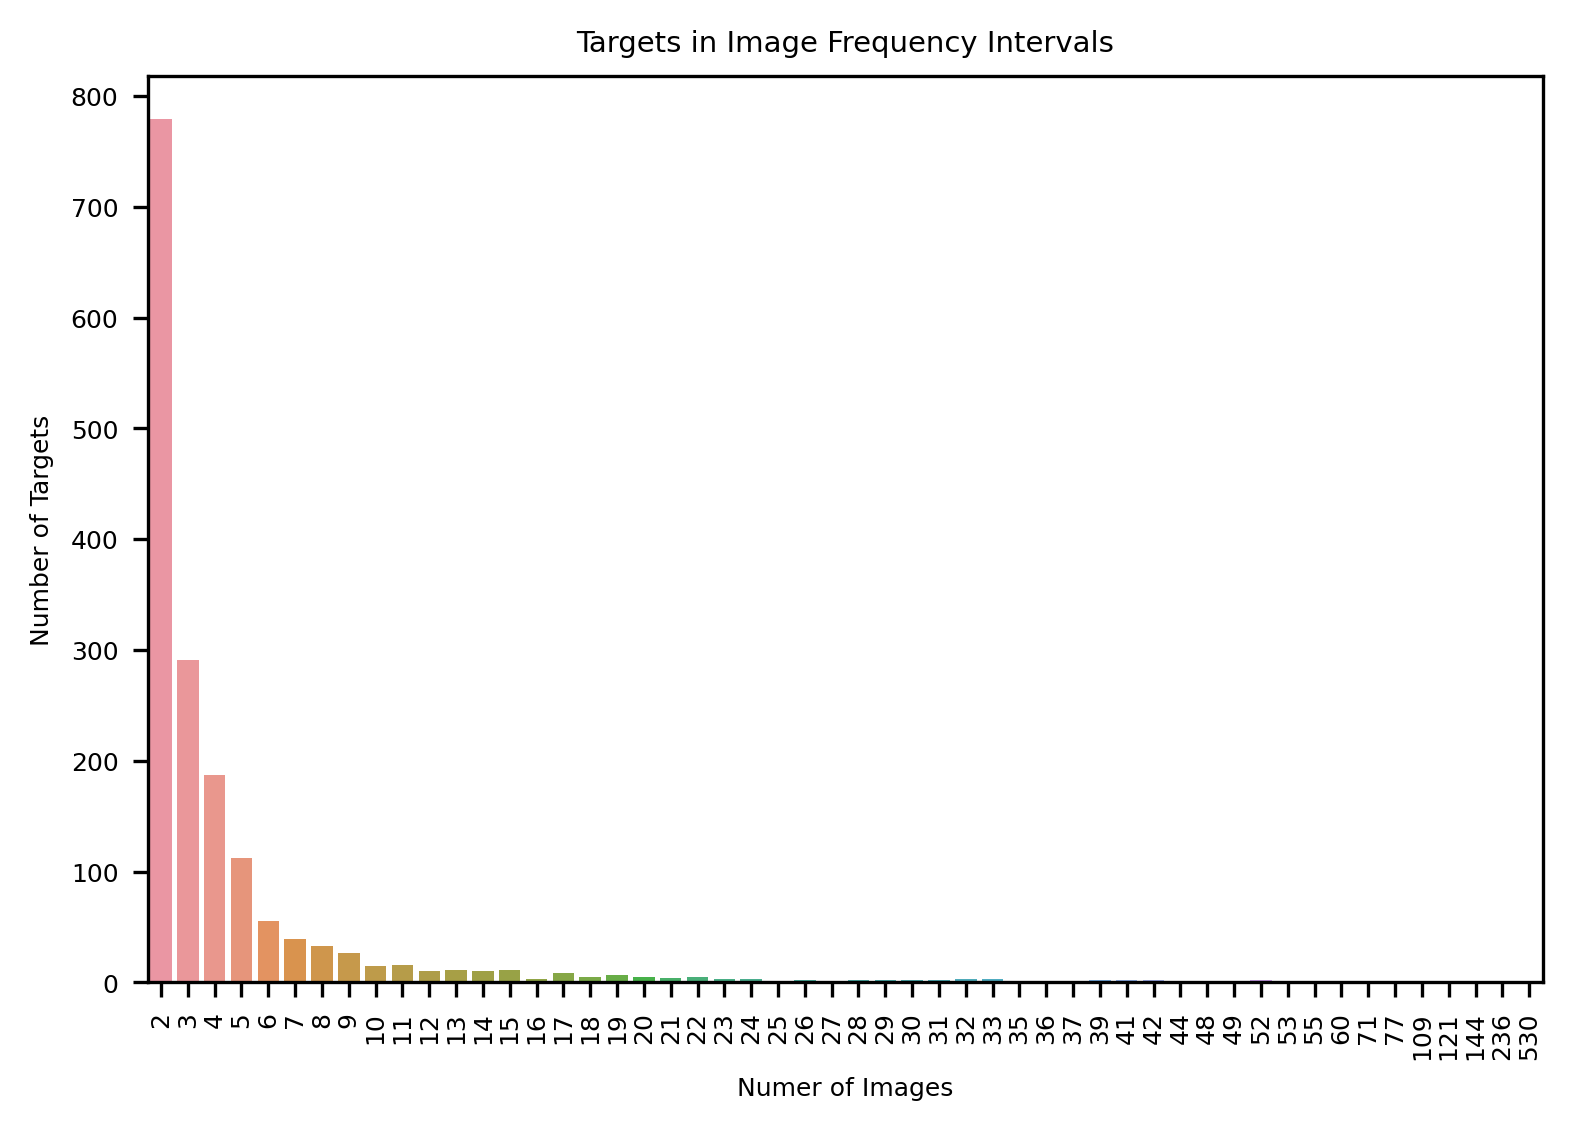

In [13]:
num_imgs_per_pid = filtered_df['pid'].value_counts()

plot_num_imgs_per_pid(num_imgs_per_pid, num_imgs_per_pid.unique())

Now that we can see the different number of images along with their targets, we should *train-test split* the data.

But we can't just simply *train-test split* the data randomly, because then we might have **all images** of a **single person** end up in the *test* data (we have images of a single person as low as 2 and 3 images).
Then the prediction for such *test* data will be completely incorrect which will result in **high variance**.

Therefore, the *train-test* split should make sure that every *person* is available in both the *train* and *test* data.

So, we will start by defining a function that will return the *person ids* that are present in the *test* data but not in the *train* data.

In [14]:
def missing_pids(train, test):
    train_pids = train.values
    
    return test[test.map(lambda x: x not in train_pids)].unique()

We will be starting by trying `sklearn.model_selection.train_test_split` and seeing if it will satisfy our requirements by having the *test* data not contain any unknown *person ids*.

In [15]:
X = filtered_df.drop(['pid'], axis=1)
y = filtered_df['pid']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print("Missing PIDs from Training Data :", len(missing_pids(y_train, y_valid)))

Missing PIDs from Training Data : 41


As you can see, we have many missing *person ids* from the *train* data. This all would result in wrong predictions.

Due to the above results, we will be using the `stratify` parameter in `train_test_split`. This helps us split the data in a stratified fashion, which means that we won't have any missing PIDs from the *train* data.

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Missing PIDs from Training Data :", len(missing_pids(y_train, y_valid)))

Missing PIDs from Training Data : 0


## Feature Selection

Before thinking about feature selection, we will be taking a look at the picture and the features we have.

According to the [`sklearn.datasets.fetch_lfw_people` docs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html), the image dimensions are *62 x 47 pixels*.

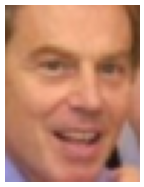

In [17]:
IMG_SHAPE = (62, 47, 3)

def printImage(img_data, dpi=50):
    img_shape = img_data.shape
    
    plt.figure(figsize=(img_shape[0] / 10, img_shape[1] / 10), dpi=dpi)
    plt.axis("off")
    plt.imshow(img_data)
    plt.show()
    
def showImage(dataset_row):
    img_data = dataset_row.apply(lambda x: int(x)).values
    img_data = img_data.reshape(IMG_SHAPE)
    
    printImage(img_data)

showImage(X.sample(n=1).iloc[0, :])

As you can see, the image is cropped on the face. Therefore, what we will be dealing with only is the actual face and not any extra unnecessary sections of the picture.

In addition, it is important to note that every pixel corresponds to 3 RGB values.

Therefore, the number of features is large because it is equal to *62 x 47 x 3*.
This is explained by a picture with a height of 62 pixels, width of 47 pixels, and each pixel is described by RGB values instead of a Grayscale value (which would correspond to only 1 value).

Therefore, we won't be removing any features from our dataset because this huge number of features is the whole actual image. In addition, having it in RGB instead of Grayscale helps decrease our bias.

## Transfer Learning

For transfer learning, we will be using [Tensorflow's Transfer Learning tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning).

We will be following the *Fine Tuning* approach of the model. It involves retraining certain layers of the convolutional base of the model.

However, we need to preprocess the data first.

### Data Preprocessing

Before we start fine tuning the model, we need to setup our train and validation datasets. We will use `ImageDataGenerator` in order to scale the RGB values of the features from `int` to `float`.

In addition, the features and the labels have to be listed in a different way than from our `DataFrame`. Each entry should have the following form:
- Image Shape : `(62, 47, 3)`
- Label : `[ True False False False ... False ]`
- Label Shape : `(1680, )`

We also need to specify a batch size in order to save memory and running out of memory. Batch size can be of different values such as 8, 16, 32, 64, 128... In our case, we will use 8 because it was the best performing one with our dataset.

In [18]:
def getImageData(X_data):
    return np.apply_along_axis(lambda x: x.reshape(IMG_SHAPE), axis=1, arr=X_data.values)

def getImageLabels(y_data):
    return [ i == y.unique() for i in y_data.values ]

batch_size = 8

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow(getImageData(X_train), y=getImageLabels(y_train),
                                        batch_size=batch_size, shuffle=True)
valid_generator = valid_datagen.flow(getImageData(X_valid), y=getImageLabels(y_valid),
                                        batch_size=batch_size, shuffle=True)

### Creating the Convolutional Model

First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the `include_top=False` argument, you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In addition, by specifying the `input_tensor=Input(shape=IMG_SHAPE))`, we would be defining our input shape to the model. We could do so by defining `input_shape=IMG_SHAPE`; however, it resulted in an error addressed in the following [GitHub issue](https://github.com/keras-team/keras/issues/8090). Therefore, we will be using this [GitHub comment](https://github.com/keras-team/keras/issues/8090#issuecomment-438025313) as a solution.

However, it is important to note that the *weights* of the neural network will be initialized to those of the `imagenet` `Dataset` with *input shape* as *224 x 224*.

In [19]:
covnet_base = tf.keras.applications.VGG16(input_tensor=tf.keras.Input(shape=IMG_SHAPE),
                                                   include_top=False, weights='imagenet',
                                                       pooling='avg')

Fine tuning the model involves training the convolutional base. Therefore, the convolutional base should be trainable.

This is important because the *weights* of the pre-trained convolutional model will be updated according to our dataset.

In [20]:
covnet_base.trainable = True

We have a small dataset and the pre-trained model is an image classification model. Therefore, we won't be retraining the whole model or all its layers. Instead, we will be freezing some of the layers and training the rest. Therefore, we can't retrain the whole convolutional model. Instead, we have to choose certain number of layers.

So, first of all, we need to see how many layers the base model has.

In [21]:
print("Number of layers in the base model: ", len(covnet_base.layers))

Number of layers in the base model:  20


Therefore, we will start fine tuning the layers from a certain layer and upwards. That way, the general layers stay the same or get frozen; meanwhile, the more specific layers are the ones that are subject to change.

In [22]:
fine_tune_at = 10

for layer in covnet_base.layers[:fine_tune_at]:
    layer.trainable =  False

### Creating the Model

We will start by creating our model, which will be a sequential model. It will start by running the Convolutional Neural Network base model, then a classification layer.

In [23]:
model = tf.keras.Sequential()

model.add(covnet_base)

We already have a global average pooling layer since we specified `pooling='max'` in the `covnet_base`. Therefore, now we need to add a classifying layer with the number of classifications we have. In addition, we will be using a *softmax* activation function.

In [24]:
classification_layer = tf.keras.layers.Dense(num_unique_pids,
                                                activation='softmax')

model.add(classification_layer)

We will compile the model so that we can use it and all its layers.

In [25]:
learning_rate = 0.00001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=1.),
                  loss='categorical_crossentropy', metrics=['accuracy'])

Now that we have the layers we want on the model, let us take a look at it.

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 1680)              861840    
Total params: 15,576,528
Trainable params: 13,841,040
Non-trainable params: 1,735,488
_________________________________________________________________


### Fine Tuning

Before fitting our model, we need to define a callback `EarlyStopping` in order to avoid overfitting our data.

This callback will monitor the *validation loss* for when it stops going down, but starts increasing instead. Once that happens, the model will stop training.

In [27]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

Similarly to earlier, we will be needing to fit the model with the *training* `Dataset` and evaluate it using the *validation* `Dataset`. The training will update the *weights* in order to achieve a better performing model.

In [28]:
fine_tune_epochs = 20

fine_tune_history = model.fit(train_generator, epochs=fine_tune_epochs,
                        validation_data=valid_generator, shuffle=True,
                           callbacks=[early_stopping])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 917 steps, validate for 230 steps
Epoch 1/20
917/917 [==============================] - 142s 155ms/step - loss: 6.8644 - accuracy: 0.0753 - val_loss: 6.3845 - val_accuracy: 0.1091
Epoch 2/20
917/917 [==============================] - 150s 164ms/step - loss: 6.0630 - accuracy: 0.1338 - val_loss: 5.8471 - val_accuracy: 0.1675
Epoch 3/20
917/917 [==============================] - 157s 171ms/step - loss: 5.3745 - accuracy: 0.1922 - val_loss: 5.4336 - val_accuracy: 0.2117
Epoch 4/20
917/917 [==============================] - 154s 168ms/step - loss: 4.7104 - accuracy: 0.2453 - val_loss: 5.1445 - val_accuracy: 0.2357
Epoch 5/20
917/917 [==============================] - 161s 176ms/step - loss: 4.0753 - accuracy: 0.3066 - val_loss: 4.9748 - val_accuracy: 0.2651
Epoch 6/20
917/917 [==============================] - 169s 184ms/step - loss: 3.4606 - accuracy: 0.3735 - val_loss: 4.7266 - val_accuracy: 0.3028
Epoch 7/20
917/917 [==========

Since the training didn't use all the epochs we assigned, we will be updating their values.

In [29]:
# update epochs used due to early stopping
fine_tune_epochs = fine_tune_history.epoch[-1]

Now we wil be plotting the *training* and *validation* accuracy and loss of the Feature Extraction against the Fine Tuning.

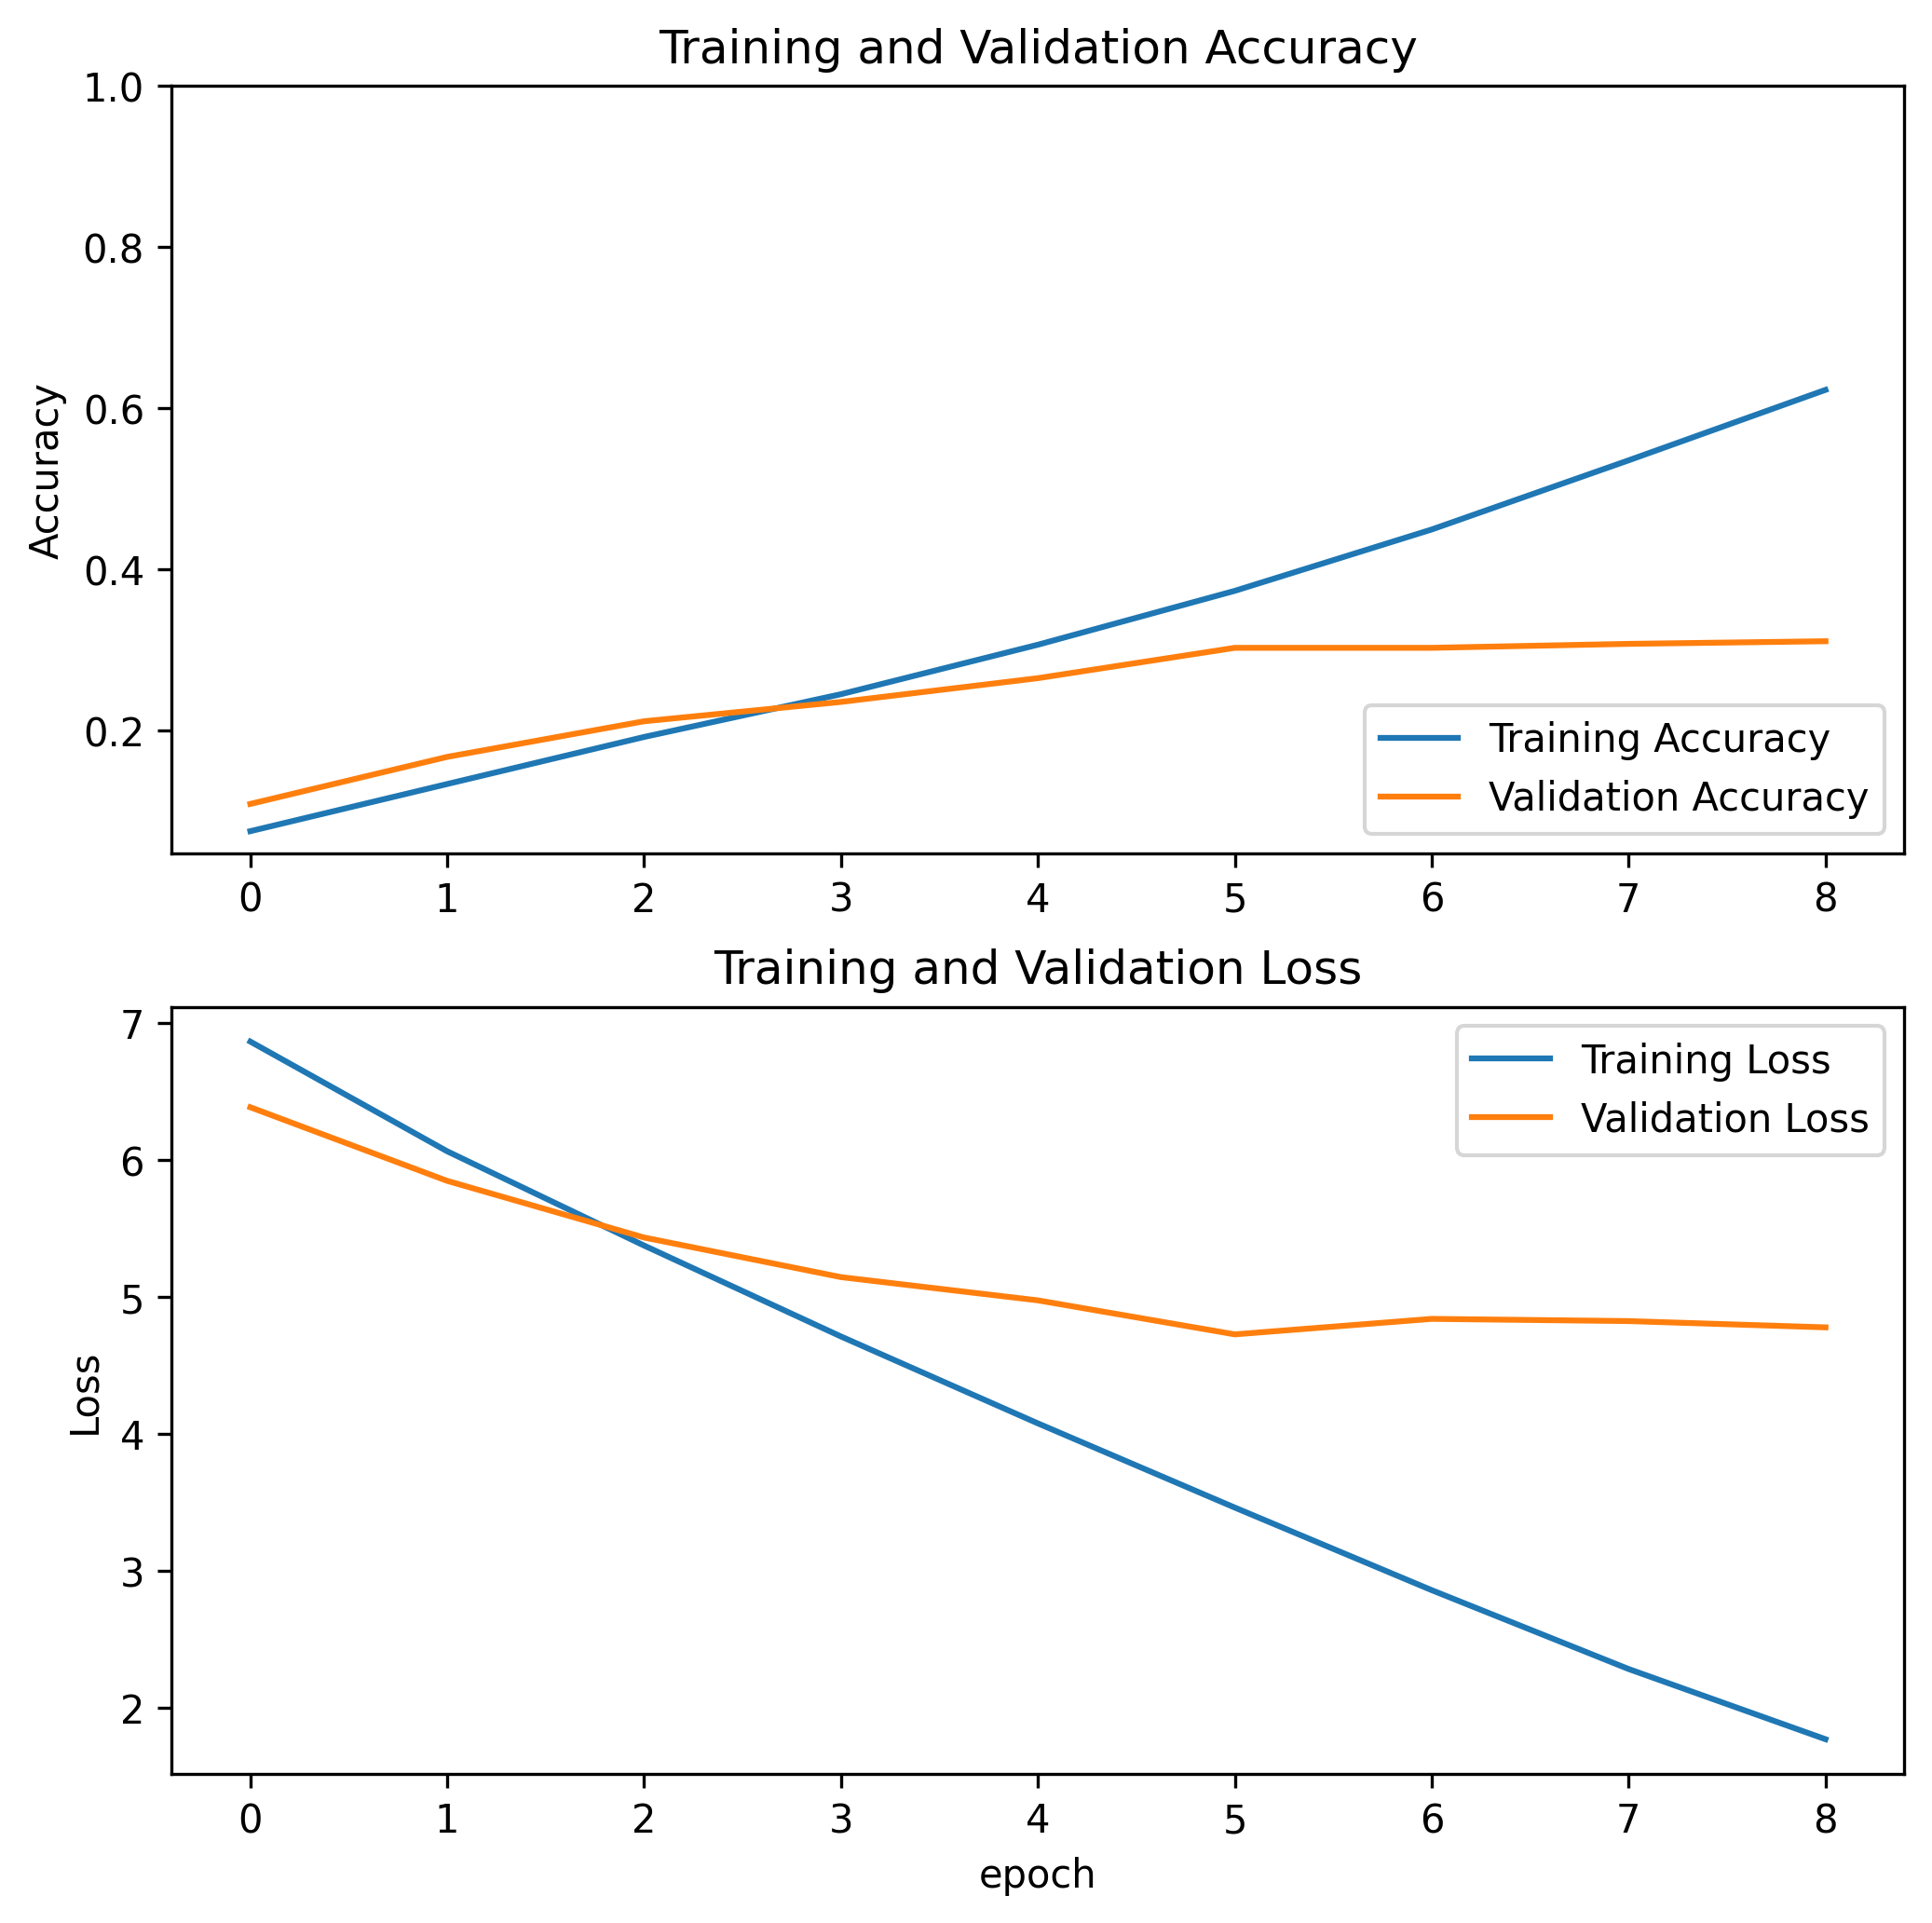

In [30]:
acc = fine_tune_history.history['accuracy']
val_acc = fine_tune_history.history['val_accuracy']

loss = fine_tune_history.history['loss']
val_loss = fine_tune_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Decreasing Validation Data

Since our dataset is already small and most people don't have enough images of themselves, let us check how many elements are taken by the *validation* set.

In [31]:
y_valid.shape

(1833,)

Out of 1680 unique people, our *validation* dataset contains 1833 people. However, those extra 153 extra images might be somewhat useful in our *train* dataset.

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=1680, random_state=42, stratify=y)

print("Missing PIDs from Training Data :", len(missing_pids(y_train, y_valid)))
print("Size of Validation Data :", y_valid.shape)

Missing PIDs from Training Data : 0
Size of Validation Data : (1680,)


Now that we have a smaller validation set, yet stratified, we need to update our validation and training data.

In [33]:
train_generator = train_datagen.flow(getImageData(X_train), y=getImageLabels(y_train),
                                        batch_size=batch_size, shuffle=True)
valid_generator = valid_datagen.flow(getImageData(X_valid), y=getImageLabels(y_valid),
                                        batch_size=batch_size, shuffle=True)

We will need to recompile the model and lower its learning rate in order not to affect the weights as much as we did before. Otherwise the model might start overfitting the training data and perform worse on the validation set.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=(learning_rate / 10), clipnorm=1.),
                  loss='categorical_crossentropy', metrics=['accuracy'])

Now that we have updated our validation and training data, we will retrain the model to see if we will witness any improvement.

In [34]:
retrain_epochs = 10
total_epochs = fine_tune_epochs + retrain_epochs

retrain_history = model.fit(train_generator, epochs=total_epochs,
                        validation_data=valid_generator, shuffle=True,
                           callbacks=[early_stopping], initial_epoch=fine_tune_history.epoch[-1])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 936 steps, validate for 210 steps
Epoch 9/18
936/936 [==============================] - 151s 161ms/step - loss: 1.7985 - accuracy: 0.7020 - val_loss: 1.8937 - val_accuracy: 0.6952
Epoch 10/18
936/936 [==============================] - 171s 183ms/step - loss: 1.6678 - accuracy: 0.7259 - val_loss: 1.8821 - val_accuracy: 0.7000
Epoch 11/18
936/936 [==============================] - 156s 167ms/step - loss: 1.5857 - accuracy: 0.7373 - val_loss: 1.8756 - val_accuracy: 0.6988
Epoch 12/18
936/936 [==============================] - 156s 166ms/step - loss: 1.5166 - accuracy: 0.7509 - val_loss: 1.8740 - val_accuracy: 0.7018
Epoch 13/18
936/936 [==============================] - 172s 184ms/step - loss: 1.4511 - accuracy: 0.7658 - val_loss: 1.8638 - val_accuracy: 0.6994
Epoch 14/18
936/936 [==============================] - 173s 185ms/step - loss: 1.3895 - accuracy: 0.7732 - val_loss: 1.8825 - val_accuracy: 0.7000
Epoch 15/18
936/936 [====

Since the training didn't use all the epochs we assigned, we will be updating their values.

In [35]:
# update epochs used due to early stopping
retrain_epochs = retrain_history.epoch[-1]
total_epochs = fine_tune_epochs + retrain_epochs

As we can see, we had a small increase in our validation accuracy.

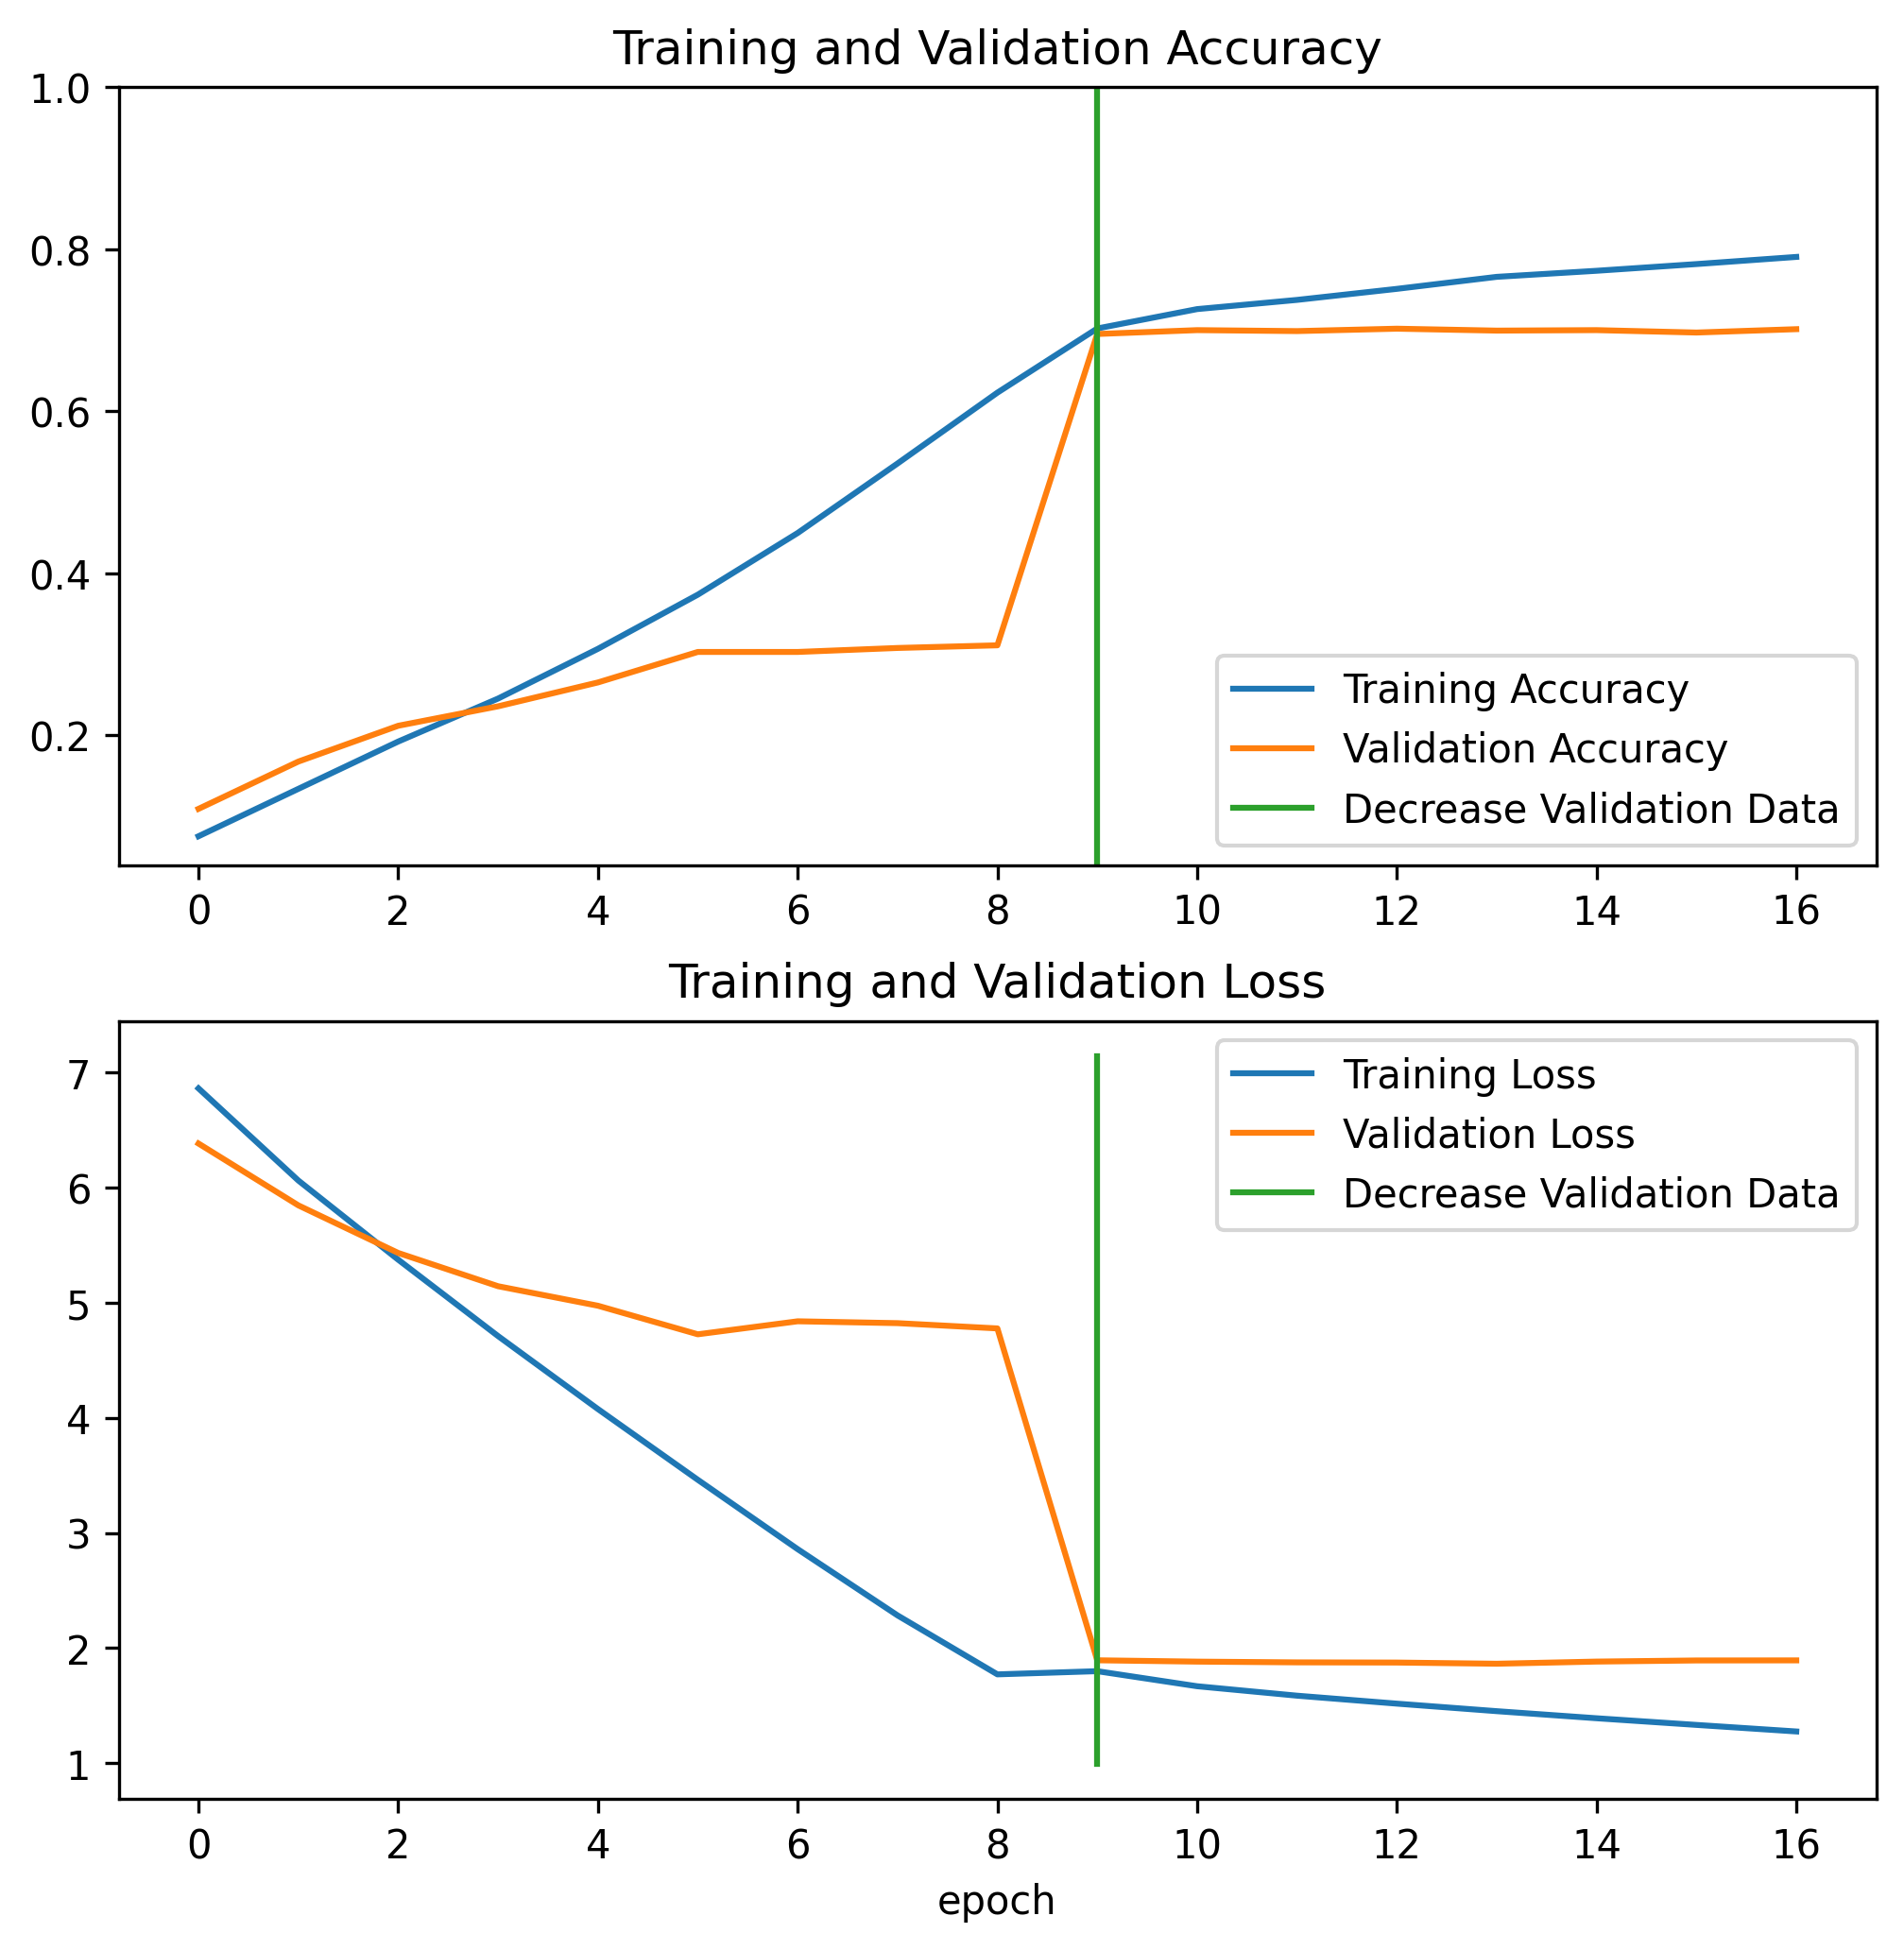

In [36]:
acc += retrain_history.history['accuracy']
val_acc += retrain_history.history['val_accuracy']

loss += retrain_history.history['loss']
val_loss += retrain_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.plot([fine_tune_epochs + 1,fine_tune_epochs + 1],
          plt.ylim(), label='Decrease Validation Data')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([fine_tune_epochs + 1,fine_tune_epochs + 1],
         plt.ylim(), label='Decrease Validation Data')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Saving the Model

We will be saving the model in order to use it later. Please note that saving the model will override any previously saved model.

In [37]:
model.save('oracle.h5')

## Loading the Saved Model

We will be loading the saved model in order to do necessary tasks later on.

In [38]:
model = tf.keras.models.load_model('oracle.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 1680)              861840    
Total params: 15,576,528
Trainable params: 13,841,040
Non-trainable params: 1,735,488
_________________________________________________________________
